In [11]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values
from ipynb.fs.full.plots import single_barplot

In [12]:
# get formatted and ready to use dataframe
df = get_df()

In [24]:
df['D3_Company_Size'].head(10)

2         1,001-2,000 employees
3     More than 2,000 employees
4              51-250 employees
5     More than 2,000 employees
6           501-1,000 employees
7         1,001-2,000 employees
8                1-10 employees
9     More than 2,000 employees
10                            0
11                            0
Name: D3_Company_Size, dtype: object

In [14]:
# mapping of old labels to new one
d3_rename_mapping = {
    '1-10 employees': '1-10',
    '11-50 employees': '11-50',
    '51-250 employees': '51-250',
    '251-500 employees': '251-500',
    '501-1,000 employees': '501-1000',
    '1,001-2,000 employees': '1001-2000',
    'More than 2,000 employees': '+2000'
}

In [15]:
df['D3_Company_Size'].value_counts().index

Index(['More than 2,000 employees', '51-250 employees', '11-50 employees',
       '1,001-2,000 employees', '0', '1-10 employees', '251-500 employees',
       '501-1,000 employees'],
      dtype='object')

In [16]:
# index of our barplot
indexes = list(df['D3_Company_Size'].value_counts().index)
# total answers of each index
values = list(df['D3_Company_Size'].value_counts())
# dataframe specific for question D3
d3_df= pd.DataFrame(data={'Company Size': rename_values(d3_rename_mapping, indexes), 'Answers': values})

In [21]:
indexes = list(df['D3_Company_Size'].value_counts().index)
indexes

['More than 2,000 employees',
 '51-250 employees',
 '11-50 employees',
 '1,001-2,000 employees',
 '0',
 '1-10 employees',
 '251-500 employees',
 '501-1,000 employees']

In [23]:
values = list(df['D3_Company_Size'].value_counts())
values

[112, 42, 28, 23, 23, 21, 20, 7]

In [18]:
d3_df

,Company Size,Answers
0,+2000,112
1,51-250,42
2,11-50,28
3,1001-2000,23
4,Not selected,23
5,1-10,21
6,251-500,20
7,501-1000,7


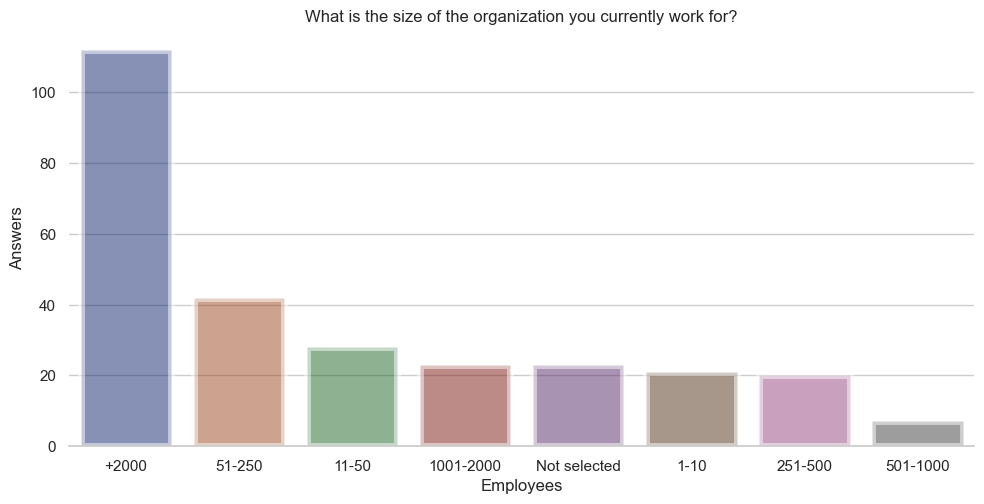

In [25]:
single_barplot(d3_df, "Company Size", "Answers", title="What is the size of the organization you currently work for?",
               x_label="Employees", y_label="Answers", x_label_rotation=0)

In [1]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


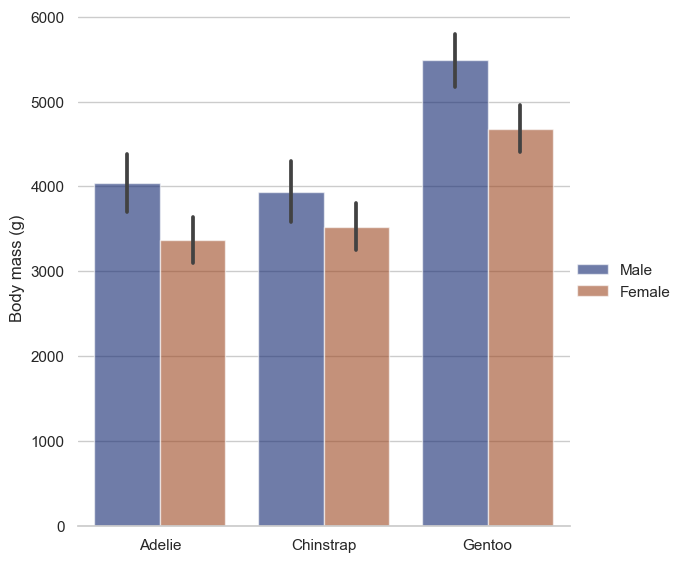

In [8]:
# Draw a nested barplot by species and sex
g = sns.catplot(data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")